# Ecommerce Customer
An Ecommerce company wants to know what user prefer the most among mobile app or website to buy their product
and also to predict the yearly amount spent and according to the result they want to design the strategy to improve the visit to mobile or website which will increase the amount spent.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 25.5+ KB


# Exploratory  Data Analysis


In [4]:
import seaborn as sns

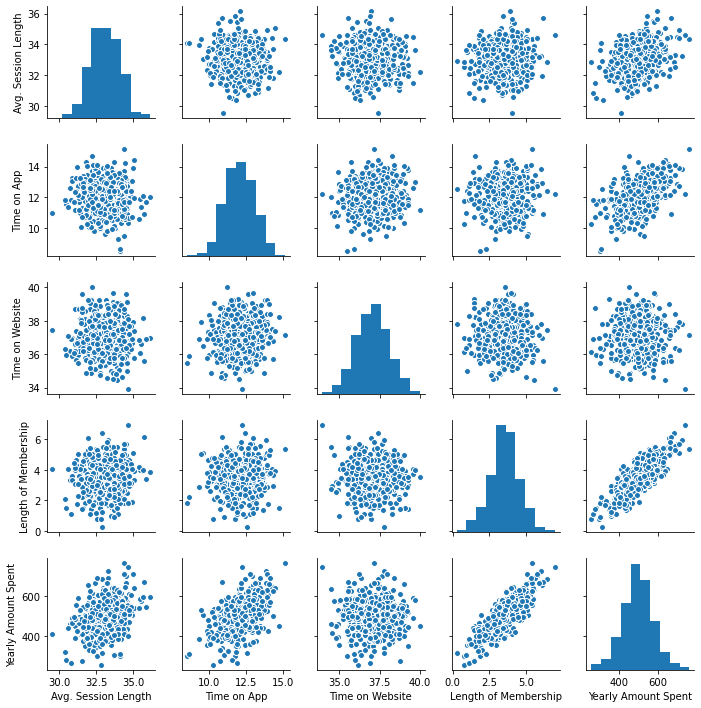

In [5]:
sns.pairplot(df, size=2)
plt.show()

From above pairplot we can see there is a linerity between length of membership and yearly amount spent

In [6]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


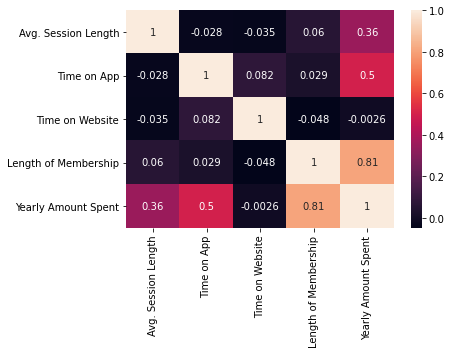

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# As we would like to know  use of app or  website , Lets assume, use of applcation depends upon length of membership()

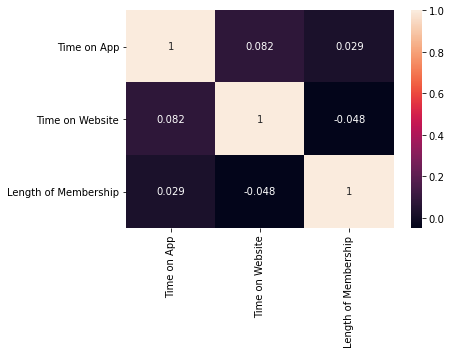

In [8]:
ls =['Time on App','Time on Website','Length of Membership']
sns.heatmap(df[ls].corr(), annot=True)
plt.show()

As we can length of membeship and  time on app is postivley correlated to yearly amount spent and  time on website is inversly correlated to amount spent

# Selecting Features and Applying train_test_split

In [9]:
X = df[['Time on App','Time on Website','Length of Membership','Avg. Session Length']]
y = df['Yearly Amount Spent']


In [10]:

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# Applying Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
ln_reg = LinearRegression()
ln_reg.fit(X_train,y_train)

pd.DataFrame(ln_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Time on App,38.851505
Time on Website,0.256385
Length of Membership,61.492050
Avg. Session Length,25.788543


In [14]:
# model evalution on Training data
y_train_pred = ln_reg.predict(X_train)
print("----------------Model Evaluation on Training data-----------------")
print("R2 score:", metrics.r2_score(y_train,y_train_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

----------------Model Evaluation on Training data-----------------
R2 score: 0.982744812260463
RMSE : 10.186528734261392


In [15]:
# model evalution on Test data
y_test_pred = ln_reg.predict(X_test)
print("----------------Model Evaluation on Training data-----------------")
print("R2 score:", metrics.r2_score(y_test,y_test_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

----------------Model Evaluation on Training data-----------------
R2 score: 0.989288813400233
RMSE : 8.848486313500288


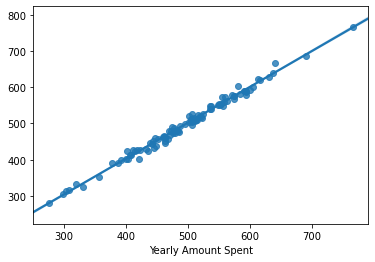

In [16]:
sns.regplot(y_test,y_test_pred)
plt.show()

In [17]:
pd.DataFrame(ln_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Time on App,38.851505
Time on Website,0.256385
Length of Membership,61.492050
Avg. Session Length,25.788543


From the above coeffiecient result  and the heatmap we can conclude that length of membership playes major role and most of the members prefer mobile app over web app. Company has to focus on website to match the perfromance of mobile app,
it will help the company to retain their customer and certainly profit them in future.